In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
x = np.arange(-5,5,0.25)
x

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
# %time operacion
fx = lambda x,y: np.cos(x)*np.sqrt(y)
fx(x,4)

array([ 0.56732437,  0.07520431, -0.4215916 , -0.89217498, -1.30728724,
       -1.64111871, -1.87291337, -1.98825935, -1.97998499, -1.84860476,
       -1.60228723, -1.25634725, -0.83229367, -0.35649211,  0.1414744 ,
        0.63064472,  1.08060461,  1.46337774,  1.75516512,  1.93782484,
        2.        ,  1.93782484,  1.75516512,  1.46337774,  1.08060461,
        0.63064472,  0.1414744 , -0.35649211, -0.83229367, -1.25634725,
       -1.60228723, -1.84860476, -1.97998499, -1.98825935, -1.87291337,
       -1.64111871, -1.30728724, -0.89217498, -0.4215916 ,  0.07520431])

In [0]:
plt?


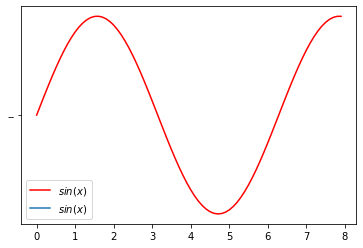

In [8]:
x = np.arange(0,8,0.1)
y = np.sin(x)
plt.plot(x,y,"r","--", label =r"$sin(x)$")
plt.legend()
plt.savefig("fig.jpg")

TAREA 1
Solución Péndulo Simple/(Como si fuera C)

*Teoría*

Comenzamos por definir nuestra ecuación diferencial
la cual es la siguiente: $\ddot{\theta}+\frac{g}{L} sin\theta = 0$.
Es reescrita para angulos pequeños y es la que procederá a resolverse:
$\ddot{\theta}+\frac{g}{L} \theta = 0$
La cual es una ecuación diferencial de segundo orden, se procede a separar en dos ecuacuaciones de primer orden de la siguiente manera:



1.   $\dot{z} = - \frac{g}{L} \theta$

1.   $\dot{\theta} = z$

Haciendo uso del Método de Euler:

$y_{i+1} = y_i + h f(x,y,y')$


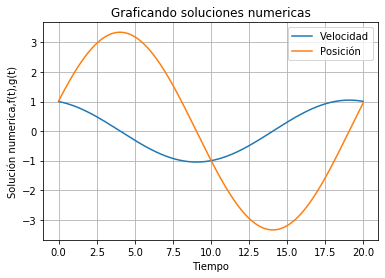

CPU times: user 210 ms, sys: 6.98 ms, total: 217 ms
Wall time: 218 ms


In [104]:


def Euler2():
  xi = 0  #Intervalos de integracion
  xf = 20
  N = 1000 #Partición del intervalo



  h  = (xf-xi)/N #Tamaño del paso


  x = []  #Arreglos donde guardaremos los datos de la solución numérica.
  ysol = []
  y_sol = []
  y1 = 1  #Condiciones iniciales
  y2 = 1
  y_=y2

  for i in range(0,N):
    y = y1 + h*(-9.81/100)*y_ # Solucionamos la ecuación diferencial 1.
    y_ = y2 + h * y #Solucionamos la ecuacion diferencial 2.
    x.append(xi) #Agregamos los datos en un arreglo para graficar
    ysol.append(y)
    y_sol.append(y_)

    xi = xi + h #Incrementamos el paso
    y1 = y  #Actualizamos las variables dependientes de cada ecuacion diferencial
    y2 = y_

  plt.plot(x,ysol)
  plt.plot(x,y_sol)
  #x,ysol,y_sol
  plt.legend(['Velocidad','Posición'])
  #plt.legend("g")
  plt.title("Graficando soluciones numericas")
  plt.ylabel("Solución numerica,f(t),g(t)")
  plt.xlabel("Tiempo")
  plt.grid()
  plt.show()

%time Euler2()

 






Ahora se buscará solucionar este mismo problema haciendo uso de las librerias de python, aplicando el mismo metodo y solucionando las mismas ecuaciones diferenciales.
Las librerias utilizadas ya estan importadas al inicio del sketch pero se mencionan aqui de nuevo:


```
import numpy as np
import matplotlib.pyplot as plt
```



In [0]:
#Comenzamos por definir las variables iniciales necesarias.
from timeit import default_timer

xi = 0  #Intervalos de integracion
xf = 20
N = 1000 #Partición del intervalo

y_1 = 1  #Condiciones iniciales
y_2 = 1

h = (xf-xi)/N #Tamaño del paso

#procedemos a crear los vectores que guardarán la solución numérica:
y1 = np.zeros(N)
y2 = np.zeros(N)
#Definimos x de esta manera, en el intervalo de [xi,xf] en equiparticiones de h.
x = np.arange(xi,xf,h) 

y1[0] = y_1
y2[0] = y_2
#x[0] = xi


In [0]:
def f(x,y): #Definimos la funcion 1
   return (-9.81/100)*y


In [0]:
def g(x,y):  #Definimos la funcion 2
  return y

In [0]:
def Euler():
  for i in np.arange(1,N):
    y1[i] = y1[i-1] + h*f(x[i-1],y2[i-1])
    y2[i] = y2[i-1] + h*g(x[i-1],y1[i-1])
  #print(x,y1,y2)

  plt.plot(x,y1)
  plt.plot(x,y2)
  plt.legend(['Velocidad','Posición'])
  #plt.legend("g")
  plt.title("Graficando soluciones numericas")
  plt.ylabel("Solución numerica,f(t),g(t)")
  plt.xlabel("Tiempo")
  plt.grid()
  plt.show()

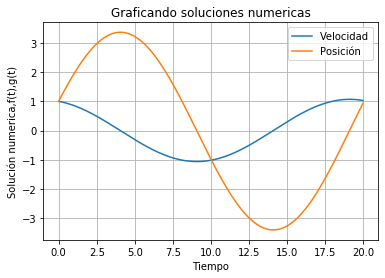

CPU times: user 217 ms, sys: 1.86 ms, total: 219 ms
Wall time: 225 ms


In [111]:
#Main

%time Euler()



Y aqui podemos apreciar que llegamos al mismo resultado.
La ventaja de usar las librerías de python y los metodos de sus clases, es que facilitan el manejo de los datos a la hora de hacer calculos y organiza de mejor forma la estructura del código.